<a href="https://colab.research.google.com/github/rejwan75/Machine_Learning-Project/blob/main/undersatnding_Backpropogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
data = load_iris()
X= data.data
y=data.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=4)
y_train = y_train.reshape((y_train.shape[0],1))
y_test = y_test.reshape((y_test.shape[0],1))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(130, 4)
(20, 4)
(130, 1)
(20, 1)


In [ ]:
learning_rate=0.12
iterations=4000
N= y_train.size
input_size=4
hidden_size = 2
output_size= 1
results = pd.DataFrame(columns=["mse","accuracy"])

In [ ]:
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size,hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))


In [ ]:
def sigmoid(x):
 return 1/(1+np.exp(-x))
def mean_squared_error(y_pred, y_true):
 return ((y_pred-y_true)**2).sum() / (2*y_pred.size)
def accuracy(y_pred, y_true):
  acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
  return acc.mean()

In [ ]:
for itr in range (iterations):
  Z1 = np.dot(X_train, W1)
  A1 = sigmoid(Z1)
  Z2 = np.dot(A1,W2)
  A2 = sigmoid(Z2)
  mse = mean_squared_error(A2,y_train)
  acc = accuracy (A2,y_train)
  results = results.append({"mse":mse,"accuracy":acc}, ignore_index = True)

  E1 = A2-y_train
  dW1 = E1* A2 * (1-A2)

  E2 = np.dot(dW1,W2.T)
  dW2 = E2 * A1 * (1 - A1)

  W2_update = np.dot(A1.T,dW1)/N
  W1_update = np.dot(X_train.T,dW2)/N

  W2 = W2 - learning_rate * W2_update
  W1 = W1 - learning_rate * W1_update



Streaming output truncated to the last 5000 lines.
<ipython-input-78-0fc7c915a23a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse,"accuracy":acc}, ignore_index = True)
<ipython-input-78-0fc7c915a23a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse,"accuracy":acc}, ignore_index = True)
<ipython-input-78-0fc7c915a23a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse,"accuracy":acc}, ignore_index = True)
<ipython-input-78-0fc7c915a23a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse,"accuracy":

<Axes: title={'center': 'Mean Squred Error'}>

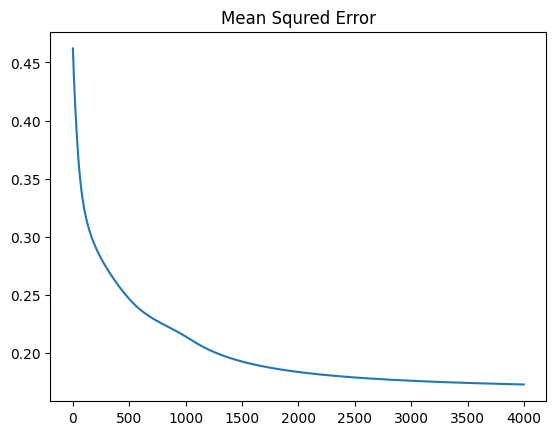

In [ ]:
results.mse.plot(title="Mean Squred Error")

<Axes: title={'center': 'Accuracy'}>

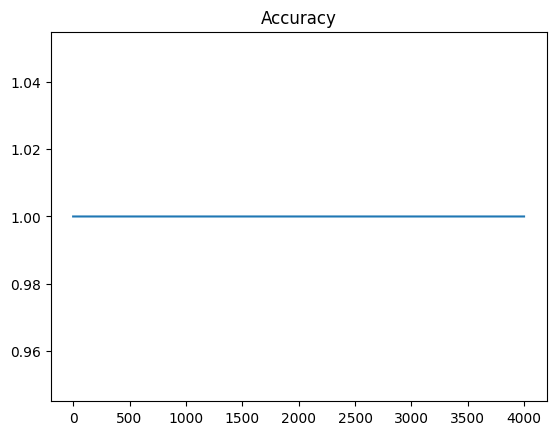

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1,W2)
A2 = sigmoid(Z2)
acc = accuracy (A2, y_test)
print("Accuracy:  {}".format(acc))

Accuracy:  1.0
